In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]] 

 [[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]]


Solution
===

In [62]:
def naive(p, q):
    D = np.empty([len(p), len(q)])
    for i in range(0, len(p)-1):
        for j in range(0,len(q)-1):
            temp = np.sqrt(np.power(p[i,0]-q[j,0],2) + np.power(p[i,1]-q[j,1],2))
            D[i][j] = temp
            
    return D
    ''' fill your code in here...
    '''
    

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [63]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [64]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]]

[[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]

In [78]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    tempD = p[rows.ravel()] - q[cols.ravel()]
    print(tempD)
    tempD = np.power(tempD,2)
    print(tempD)
    D = tempD[:,0] + tempD[:,1]
    print(D)
    D = np.sqrt(D)
    print(D)
    
    

In [79]:
with_indices(p,q)

[[ 0.60220981 -0.06758786]
 [ 0.08596082 -0.9326414 ]
 [ 0.76737238 -0.49144031]
 [-0.04130032 -0.59177412]
 [ 0.04956533 -0.27112412]
 [ 0.4645374   0.66046407]
 [-0.05171158 -0.20458946]
 [ 0.62969997  0.23661162]
 [-0.17897273  0.13627782]
 [-0.08810708  0.45692781]
 [ 0.32939618  0.13645683]
 [-0.18685281 -0.7285967 ]
 [ 0.49455875 -0.28739562]
 [-0.31411395 -0.38772942]
 [-0.22324831 -0.06707942]
 [ 0.02895203  0.6721909 ]
 [-0.48729695 -0.19286263]
 [ 0.1941146   0.24833845]
 [-0.6145581   0.14800465]
 [-0.52369245  0.46865464]]
[[  3.62656651e-01   4.56811947e-03]
 [  7.38926342e-03   8.69819975e-01]
 [  5.88860365e-01   2.41513582e-01]
 [  1.70571630e-03   3.50196606e-01]
 [  2.45672153e-03   7.35082878e-02]
 [  2.15794994e-01   4.36212786e-01]
 [  2.67408786e-03   4.18568486e-02]
 [  3.96522050e-01   5.59850583e-02]
 [  3.20312369e-02   1.85716431e-02]
 [  7.76285799e-03   2.08783028e-01]
 [  1.08501841e-01   1.86204668e-02]
 [  3.49139711e-02   5.30853152e-01]
 [  2.44588353e

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [70]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [71]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [72]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

84.9 ms ± 4.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
65 µs ± 922 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
843 µs ± 7.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.09 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


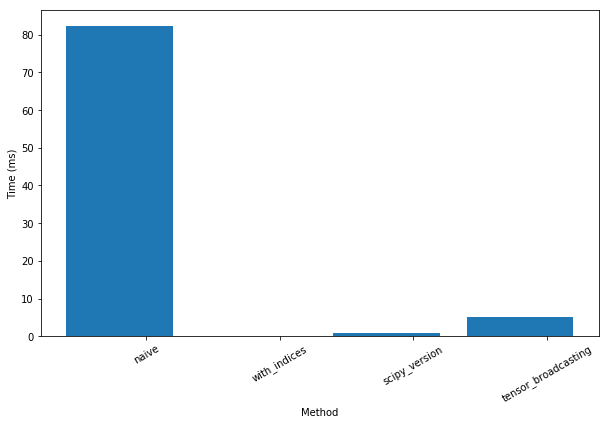

In [73]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()